


# Data Preprocessing
 
Data preprocessing in a machine learning system generally transforms an input raw data into a dataset with format ready for further data analysis. It is necessary as the raw data may not be in the form suitable for the machine, like having an empty or missing data, non-numerical data or unscaled data. 

This preprocessing usually involves the following steps:

- Step-1: Reading the raw data
- Step-2: Identify features and outcome and split them
- Step-3: Handling any missing data
- Step-4: Handling any categorical data
- Step-5: Scaling the features
- Step-6: Splitting training and test data

The following scripts demonstrate the procedure in data preprocessing. Firstly, we need import all the commonly necessary packages:

In [1]:
# Importing common required packages
print("\n--Importing necessary packages")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook


--Importing necessary packages


## Step 1: Reading the Dataset

It is common to have dataset available in an Excel Sheet as CSV file format. If it is given in a simple text format, you may need to convert it into a CSV file. Here is **Data.csv** as an example:

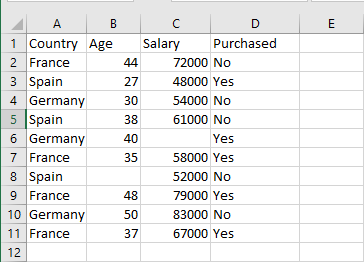

The *pandas* package provides the method *read_csv()* to read data from a CSV file, store it into the *pandas* data frame format (*DataFrame*).


In [2]:
pdDataset = pd.read_csv('Data.csv') # from pandas
print('\n--The head (the first 5 records) of the dataset: \n\n', pdDataset.head())
print('\n--Type of pdDataset: ', type(pdDataset))
print('--Shape/size of pdDataset: ', pdDataset.shape)
print('--Columns name of pdDataset: ', pdDataset.columns)


--The head (the first 5 records) of the dataset: 

    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes

--Type of pdDataset:  <class 'pandas.core.frame.DataFrame'>
--Shape/size of pdDataset:  (10, 4)
--Columns name of pdDataset:  Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')


The dataset *pdDataset* has 10 records (samples or datapoints). Each has 3 independent variables (IV), and 1 dependent variable (DV). 
The IVs are *Country*, *Age* and *Salary*, and the DV is *Purchased*. The *Purchased* depends on the variables *Country*, *Age* and *Salary*. Other names for IV are *predictor, feature*, or *attribute*, while for DV, *output*, *outcome* or *label*. We will use the term **feature** and **outcome** for short. 


## Step-2: Identify features and outcomes, and split them

The *pdDataset* has three features (*Country, Age* and *Salary*) and one outcome (*Purchased*). Please note that in any dataset, there can be more than one outcome, which require us to select the one as the target for learning.  

In [3]:
# Extract all rows (:), and all columns but minus 1 (:-1), i.e. last column removed
X = pdDataset.iloc[:, :-1].values  

# Extract all rows and only one column 3. Note that row and column number start with 0  
y = pdDataset.iloc[:, 3].values    

print('\n--The type of X, the features matrix: ', type(X))
print('--The size of X: ', X.shape)
print('--The X: \n', X)

print('\n\n--The type of y, the outcome vector: ', type(y))
print('--The size of y: ', y.shape)
print('--The y:\n', y)


--The type of X, the features matrix:  <class 'numpy.ndarray'>
--The size of X:  (10, 3)
--The X: 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


--The type of y, the outcome vector:  <class 'numpy.ndarray'>
--The size of y:  (10,)
--The y:
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


The *numpy* package provides the array format to store the $X$ and the $y$. The notation $X$ is commonly used as matrix for features, while $y$ for the outcome.
There is another way to obtain the same arrays while still keeping the *DataFrame* type of *pandas*. The *DataFrame* type, however, gives a more convenient way in extracting information and visualizing it. You can learn more on it in the *pandas* documentation.

In [4]:
# The X_col and y_col are remain in panda's DataFrame type 
X_col = pdDataset[['Country', 'Age', 'Salary']]      
y_col = pdDataset[['Purchased']]

print('--The type of X_col: ', type(X_col))
print('--The shape of X_col: ', X_col.shape)
print('--X_col.head():\n', X_col.head())
print('--X_col.shape: ', X_col.shape)

print('\n--X_col.info(): \n', X_col.info())
print('\n--X_col.describe(): \n', X_col.describe())

--The type of X_col:  <class 'pandas.core.frame.DataFrame'>
--The shape of X_col:  (10, 3)
--X_col.head():
    Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
--X_col.shape:  (10, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10 non-null     object 
 1   Age      9 non-null      float64
 2   Salary   9 non-null      float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes

--X_col.info(): 
 None

--X_col.describe(): 
              Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000


If you want, you can convert the array's type from *DataFrame* of *pandas* to the *numpy* array:

In [5]:
X_arr = np.array(X_col) # The X_col (DataFrame) can be converted to a numpy array
print('--The X_arr: \n', X_arr)
print('--X_arr type: ', type(X_arr))
print('--X_col type: ', type(X_col))

--The X_arr: 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
--X_arr type:  <class 'numpy.ndarray'>
--X_col type:  <class 'pandas.core.frame.DataFrame'>


### Step 3: Handling The Missing Data

The $X$  has missing data, which are replaced with *nan* or *NaN*. This missing data comes from the empty cells in the CSV file. 
One technique to deal with this missing data is to fill them with the average of its column. We will use this filling technique, by using *SimpleImputer* class from *sklearn* package. The method *fit* from this class is used to replace the *nan* or *NaN* with values. For the removal technique, the method *dropna()* (*pandas.DataFrame.dropna*) can be used.

In [6]:
print("--The X, BEFORE missing data is handled")
print(X)

from sklearn.impute import SimpleImputer
myimputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
myimputer = myimputer.fit(X[:, 1:3]) # all rows, but only column 1 and subsequent columns less than 3
X[:, 1:3] = myimputer.transform(X[:, 1:3])
print("--The X, AFTER missing data is handled")
print(X)

--The X, BEFORE missing data is handled
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
--The X, AFTER missing data is handled
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


You may want to save the dataset back to a CSV file, after filling all the missing data. Here is how to do it: 

In [7]:
Z = pdDataset.iloc[:, :].values # get all dataset into an numpy array size (10,4)
myimputer = SimpleImputer(missing_values = np.nan, strategy='mean')
myimputer = myimputer.fit(Z[:, 1:3]) # fit with Z col 1 to 2, i.e. Age and Salary
Z[:, 1:3] = myimputer.transform(Z[:, 1:3])

# now write to the CSV files with various styles
pd.DataFrame(Z).to_csv("DataZ-0.csv")
pd.DataFrame(Z).to_csv("DataZ-1.csv", header=None, index=None)
pd.DataFrame(Z).to_csv("DataZ-2.csv", header=['TheCountry','TheAge','TheSalary','Purchased'], index=None)

Here is the *DataZ-0.csv*:
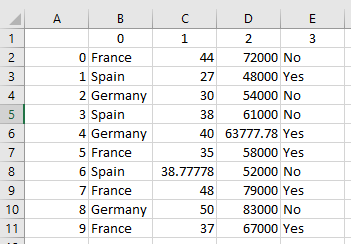

Here is the *DataZ-1.csv*:
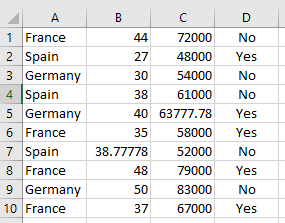

Here is the *DataZ-2.csv*:
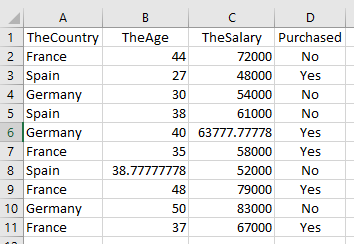

### Step 4: Handling Categorical Data

The feature array $X$ has categorical data in the form of string in col-0. This string variable cannot be included into a numerical data analysis performed by the machine. So we need to convert it into numerical data. Array $X$ has col-0 values *'France', 'Germany'* and *'Spain'*. We can make a label on this category, and encode them into numeric. Encoding is ordered based on alphabet. Please notice the col-0 of $X$, after conversion. We use *OneHotEncoder* class from *sklearn* package, and its *fit_transform()* method:


In [8]:
from sklearn.preprocessing import OneHotEncoder
print('--The X: \n', X) # notice, we want to encode the col-0
country = np.unique(X[:,0])  # get unique data from col-0, it is numpy array
ohe = OneHotEncoder(categories=[country]) # object to create the encoder, type sklearn
Xcol0 = ohe.fit_transform(X[:, 0:1]).toarray() # now col-0 is encoded, it is numpy array
Xcoded = np.append(Xcol0, X[:, 1:3], axis=1) # now append the encoded one to the X (but only col-1 to col-2)
print('\n--The encoded Xcoded: \n', Xcoded)

--The X: 
 [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]

--The encoded Xcoded: 
 [[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


We will also need to encode the outcome $y$ too:

In [9]:
from sklearn.preprocessing import OneHotEncoder
print('--The y: \n', y)
ycoded = np.reshape(y,(len(y),1)) # convert from (1,10) to (10,1), len(y) is 10
purch = np.unique(ycoded[:,0]) # get unique data
ohe = OneHotEncoder(categories=[purch]) # use it to create encoder object
ycoded = ohe.fit_transform(ycoded[:, 0:1]).toarray() # encode to an array
print('\n--The encoded ycoded: \n', ycoded)

--The y: 
 ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']

--The encoded ycoded: 
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


.

**Dummy Variable Trap**

Handling a categorical data can introduce a situation of dummy variable trap. If you notice the $Xcoded$, there are col-0, col-1 and col-2 as result of converting categorical variable into numerical variable. These additionally created 3 columns, actually bring duplicated information. Here are these 3 columns for all rows:

In [10]:
print(Xcoded[:,:])

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


Col-0 can be seen as a dummy variable since the information contained is also contained by col-1 and col-2. Notice that col-0 will only be '1' when col-1 and col-2 are both '0'. So it is like a redundant information. The machine does not need col-0, as its impact on the outcome is the same as when col-1 and col-2 are both '0'. Keeping col-0 could trap the machine to process unnecessary data and slow down the process.

From binary number encoding perspective, what is needed is to encode 3 categories (*France, Spain* and *Germany*), so 2 bits should be sufficient, which are represented by col-1 and col-2. Thus we can actually remove col-0:

In [11]:
# Now remove col-0, by retrieving only col-1 to the end
Xcodedclean = Xcoded[:, 1:] # retrieve all rows, but only from col-1
print("--The Xcodedclean: \n", Xcodedclean)
print("--Shape of Xcodedclean: ", Xcodedclean.shape)

--The Xcodedclean: 
 [[0.0 0.0 44.0 72000.0]
 [0.0 1.0 27.0 48000.0]
 [1.0 0.0 30.0 54000.0]
 [0.0 1.0 38.0 61000.0]
 [1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 35.0 58000.0]
 [0.0 1.0 38.77777777777778 52000.0]
 [0.0 0.0 48.0 79000.0]
 [1.0 0.0 50.0 83000.0]
 [0.0 0.0 37.0 67000.0]]
--Shape of Xcodedclean:  (10, 4)


The $Xcodedclean$ has been cleaned from the unnecessary dummy information. So let's transfer the $Xcodedclean$ back to the original feature array $X$, and also save it into a file. You can do the same way with the $y$ too.

In [12]:
X = Xcodedclean
np.savetxt("Data-X.csv", X, delimiter=",") # Let's save the X into a CSV


### Step 5: Scaling The Variables

If we look at the feature $X$ ( I have saved it into *Data-X.csv*), there is unscaled range of value between *Salary* and *Age* feature. 
The *Salary* is in the range of ten thousands, while the *Age* is no more than hundred. It can cause problem as the machine may ignore the *Age* due to its very low value as compared with the *Salary*. Scaling will not cause any loss of information, since the machine will learn more on its pattern and its relationship with the outcome, *Purchased*. Here is the original unscaled data and its plot:

--Statistic of X: 
              Age        Salary
count  10.000000     10.000000
mean   38.700000  63777.700000
std     7.257946  11564.099408
min    27.000000  48000.000000
25%    35.500000  55000.000000
50%    38.000000  62388.500000
75%    43.000000  70750.000000
max    50.000000  83000.000000


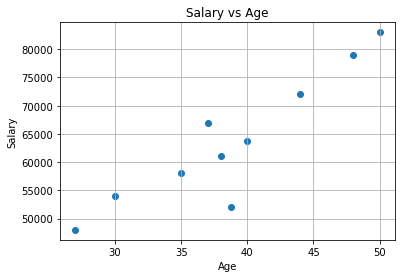

In [13]:
# Print the statistic of X
Xdf = pd.DataFrame({'Age':X[:,2], 'Salary':X[:,3]})
print('--Statistic of X: \n',Xdf.astype(int).describe()) # Use Xdf.astype(int).describe() instead of only Xdf.describe()

# Plot the X
plt.scatter(X[:,2],X[:,3])
plt.title('Salary vs Age') 
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()

There are many techniques for scaling provided by *sklearn*, the one we will use here is Standard Scaling (*StandardScaler*), which "normalize" the mean of the features to 0. Note that the machine is interested in predicting the impact of each independent variable to the outcome, not on the absolute value of the feature. So let us do the scaling, and then plot it:

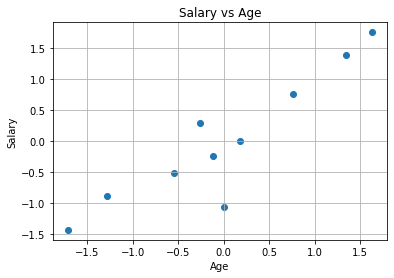

--Statistic of scaled X: 
              Age     Salary
count  10.000000  10.000000
mean    0.000000   0.000000
std     0.666667   0.666667
min    -1.000000  -1.000000
25%     0.000000   0.000000
50%     0.000000   0.000000
75%     0.000000   0.000000
max     1.000000   1.000000


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create object, for calling its method
Xscaled = scaler.fit_transform(X)    # fit first and then transform
                                     # directly transform, as already fit previously
                                     # fit with the same scaling                                   
plt.scatter(Xscaled[:,2],Xscaled[:,3])
plt.title('Salary vs Age'); plt.xlabel('Age'); plt.ylabel('Salary')
plt.grid()
plt.show()
Xdf = pd.DataFrame({'Age':Xscaled[:,2], 'Salary':Xscaled[:,3]})        
print('--Statistic of scaled X: \n',Xdf.astype(int).describe()) # Use Xdf.astype(int).describe() 
                                                                # instead of only Xdf.describe()
np.savetxt("Data-Xscaled.csv", Xscaled, delimiter=",") # Let's save the Xscaled into a CSV

Notice that the scaled $X$ now has mean = 0, and the STD = 0.666667, or variance = 0.49999, for both *Salary* and *Age*. If you compare both plots, you will notice that both have same pattern.

### Step 6: Training Data and Test Data

Now we will split the dataset into *Training Data* and *Test Data*. Training Data is used to train the machine to  generate a model. The Test Data is used to test the generated model. How much is the test data set aside from the entire dataset? Typically is 20% (0.2). Here is the way to split the input dataset. Note that the split is for both predictor array and outcome array.
The *X_train* and *y_train* are training data, and the *X_test* and *y_test* are test data. 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=0)
print("--The X_train: \n",X_train)
print("--The X_test: \n",X_test)
print("--The y_train: \n",y_train)
print("--The y_test: \n",y_test)

--The X_train: 
 [[ 1.52752523e+00 -6.54653671e-01  1.77608893e-01  6.63219199e-16]
 [-6.54653671e-01 -6.54653671e-01 -2.58340208e-01  2.93712492e-01]
 [-6.54653671e-01  1.52752523e+00 -1.71150388e+00 -1.43817841e+00]
 [-6.54653671e-01  1.52752523e+00  0.00000000e+00 -1.07356980e+00]
 [-6.54653671e-01 -6.54653671e-01  1.34013983e+00  1.38753832e+00]
 [-6.54653671e-01  1.52752523e+00 -1.13023841e-01 -2.53200424e-01]
 [-6.54653671e-01 -6.54653671e-01  7.58874362e-01  7.49473254e-01]
 [-6.54653671e-01 -6.54653671e-01 -5.48972942e-01 -5.26656882e-01]]
--The X_test: 
 [[ 1.52752523 -0.65465367 -1.27555478 -0.89126549]
 [ 1.52752523 -0.65465367  1.63077256  1.75214693]]
--The y_train: 
 ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes']
--The y_test: 
 ['No' 'No']


Now the dataset is ready for further data analysis for creating a model.<br>
Not every step is necessary in preparing the input data. For example, in particular situation scaling the variable may not be necessary, as all variables are already in acceptable value range when compared each other. Or no need to deal with any dummy variable, as there is no categorical variable involved.

Resources for dataset are publicly available and can be learned from this article:<br>
&emsp;https://www.dataquest.io/blog/free-datasets-for-projects/<br>
&emsp;https://www.stats.govt.nz/large-datasets/csv-files-for-download/<br>

Other useful tutorial resources: <br>
&emsp;https://www.learnpython.org<br>
&emsp;https://www.tutorialspoint.com/python_pandas/index.htm<br>

The syntax rule for writing this Markdown text can be found here:<br>
&emsp;https://help.github.com/en/articles/basic-writing-and-formatting-syntax

Resources for the packages:<br>
&emsp;numpy:<br> 
&emsp;&emsp;https://numpy.org/devdocs/user/quickstart.html<br>
&emsp;&emsp;https://numpy.org/index.html<br>
&emsp;panda:<br> 
&emsp;&emsp;https://pandas.pydata.org/index.html<br>
&emsp;&emsp;https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html<br>
&emsp;matplotlib:<br> 
&emsp;&emsp;https://matplotlib.org/tutorials/index.html<br>
&emsp;scikit-learn:<br> 
&emsp;&emsp;https://scikit-learn.org/stable/#<br>

Author: Chebron Padmanaba